In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/ola.csv')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,3,2,6.66,76.62,9.57,5,128,133
1,1/1/2011 1:00,4,3,13.54,55.91,4.01,36,184,220
2,1/1/2011 2:00,1,3,29.58,20.97,33.61,34,97,131
3,1/1/2011 3:00,3,1,7.40,61.64,15.85,6,47,53
4,1/1/2011 4:00,3,4,30.66,98.71,11.47,14,199,213


In [4]:
# Prepare the data
X = df[['datetime', 'season', 'weather', 'temp', 'humidity', 'windspeed', 'casual', 'registered']]
y = df['count']

In [5]:
# Convert datetime to appropriate format (example using datetime features)
X['datetime'] = pd.to_datetime(X['datetime'])
X['hour'] = X['datetime'].dt.hour
X['dayofweek'] = X['datetime'].dt.dayofweek
X['month'] = X['datetime'].dt.month
X = X.drop('datetime', axis=1)

<ipython-input-5-ef284435a011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'])


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train a RandomForestRegressor (you can experiment with other algorithms)
model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune hyperparameters further
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model (example using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Calculate R-squared
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}") # Print R-squared

Mean Squared Error: 0.4207640036730945
R-squared: 0.9998765213198814


In [10]:
# Example features (replace with appropriate values from your dataset)
example_features = pd.DataFrame({
    'season': [1],
    'weather': [1],
    'temp': [0.24],
    'humidity': [0.81],
    'windspeed': [0.0],
    'casual': [3],
    'registered': [13],
    'hour': [0],
    'dayofweek': [0],
    'month':[1]
})

example_prediction = model.predict(example_features)
print(f"Predicted count for example data point: {example_prediction[0]}")

Predicted count for example data point: 16.5


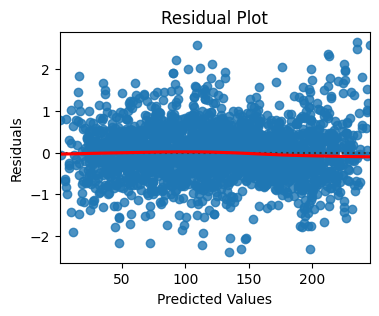

In [18]:
# Calculate residuals
residuals = y_test - y_pred
# Plot residuals
plt.figure(figsize=(4, 3))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

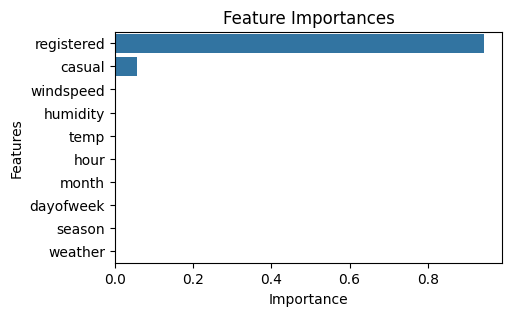

In [19]:
# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

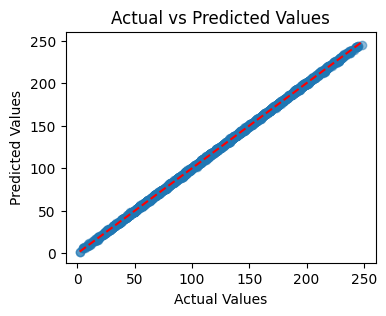

In [20]:
# Actual vs Predicted Plot
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

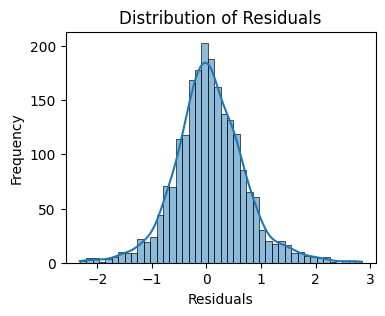

In [21]:
# Distribution of residuals
plt.figure(figsize=(4, 3))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()